<center>
    
    COMP5450 - Machine Learning
    
# Implementing CTM with PyTorch
    
</center>

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nunomestre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


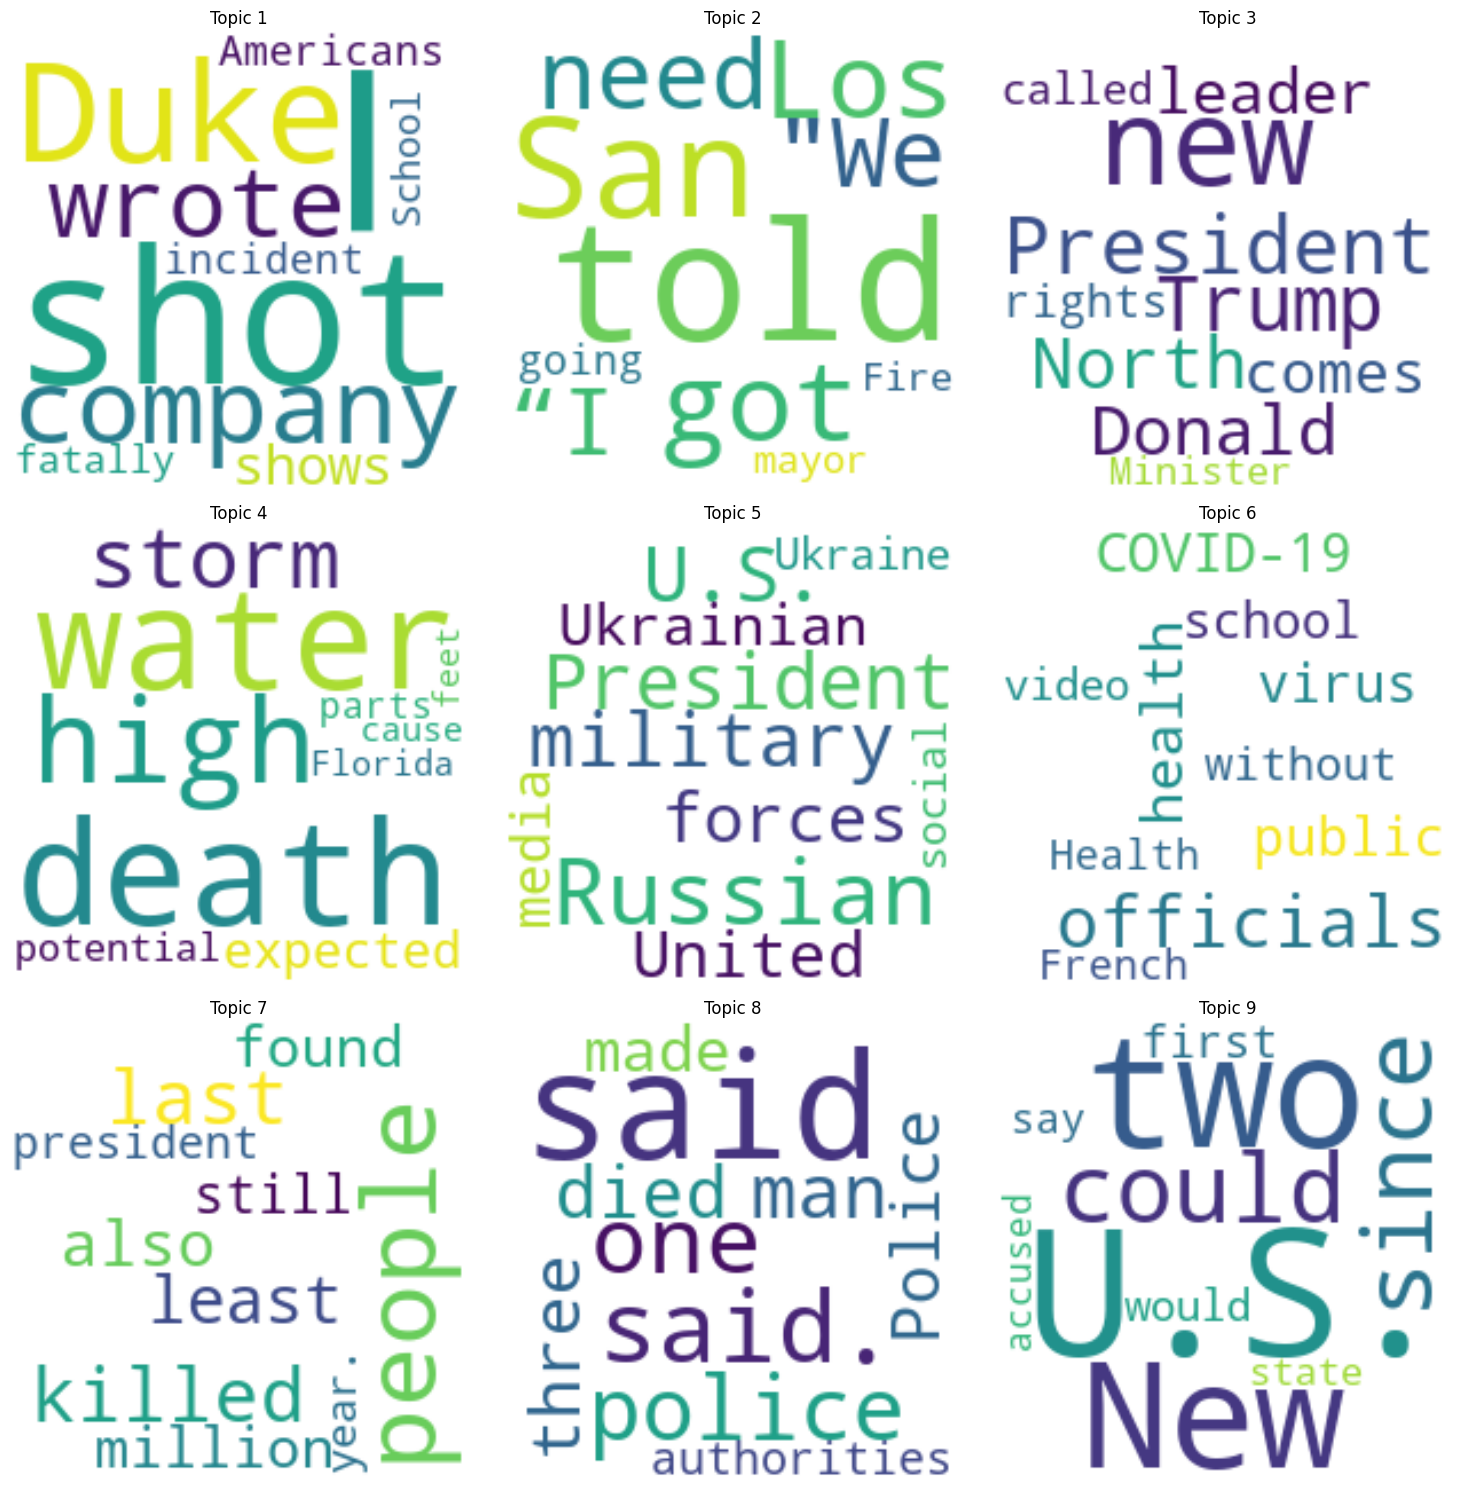

[[ 1.          0.1401836   0.01793285  0.10930796 -0.28822094  0.0235724
   0.02045975  0.1139878  -0.02945742]
 [ 0.1401836   1.          0.04974171  0.10920431 -0.34914577  0.03260555
  -0.00436394  0.11620827 -0.07135046]
 [ 0.01793285  0.04974171  1.         -0.3274303   0.03937157  0.04095182
  -0.048442   -0.10058369 -0.05407665]
 [ 0.10930796  0.10920431 -0.3274303   1.         -0.4129937   0.00841768
   0.04279743  0.09444295  0.01070746]
 [-0.28822094 -0.34914577  0.03937157 -0.4129937   1.         -0.3695113
  -0.01390063 -0.11557775  0.02941644]
 [ 0.0235724   0.03260555  0.04095182  0.00841768 -0.3695113   1.
  -0.13469017 -0.10887907  0.0263647 ]
 [ 0.02045975 -0.00436394 -0.048442    0.04279743 -0.01390063 -0.13469017
   1.          0.03560362 -0.06212569]
 [ 0.1139878   0.11620827 -0.10058369  0.09444295 -0.11557775 -0.10887907
   0.03560362  1.         -0.0887832 ]
 [-0.02945742 -0.07135046 -0.05407665  0.01070746  0.02941644  0.0263647
  -0.06212569 -0.0887832   1.    

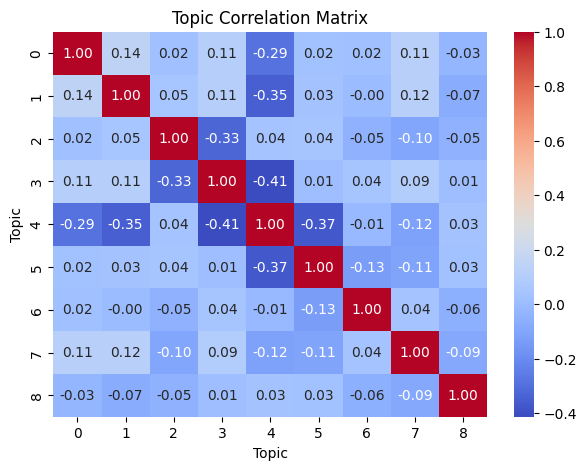

In [1]:
import pandas as pd
import tomotopy as tp
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import seaborn as sns

nltk.download('stopwords')

df = pd.read_json('News_Category_Dataset_v3.json', lines=True)

df = df[df['category'].str.contains("NEWS", case=False, na=False)]

documents = df['short_description'].dropna().tolist()

stop_words = set(stopwords.words('english'))

def remove_stopwords(doc):
    return ' '.join([word for word in doc.split() if word.lower() not in stop_words])

documents = [remove_stopwords(doc) for doc in documents]

model = tp.CTModel(k=9)
for doc in documents:
    model.add_doc(doc.split())

model.train(0)
for i in range(1000):
    model.train(1)

plt.figure(figsize=(15,15))

# WordClouds
for k in range(model.k):
    word_freq = model.get_topic_words(k, top_n=10)
    wc = WordCloud(background_color='white', width=200, height=200).generate_from_frequencies(dict(word_freq))
    plt.subplot(3, 3, k+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {k + 1}")

plt.tight_layout()
plt.show()

# Correlation Matrix
correlation_matrix = model.get_correlations()
print(correlation_matrix)

plt.figure(figsize=(7, 5))
plt.title('Topic Correlation Matrix')
plt.xlabel('Topic')
plt.ylabel('Topic')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()
